# Data Science Regression Project: Predicting  Home Prices in Banglore


# Important libraries for this project

In [3]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)

In [4]:
df = pd.read_csv("Bengaluru_House_Prices.csv")
df.head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


In [5]:
df.shape

(13320, 9)

In [6]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [7]:
df.size

119880

In [8]:
# examine the area_type feature

df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [9]:
# lets drop certain columns from our dataframe! 

# lets assume availability is not important in finding out the area price
# so is society

# Feature Engineering

In [10]:
# dropping some columns:-
df1 = df.drop(['area_type','society','balcony','availability'], axis = 'columns')
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


# Data Cleaning process:-

* data cleaning process starts with handling NaN values

In [11]:
df1.isnull()

,location,size,total_sqft,bath,price
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
13315,False,False,False,False,False
13316,False,False,False,False,False
13317,False,False,False,False,False
13318,False,False,False,False,False


In [12]:
df1.isnull().sum()

# isnull().sum() lets us know the no of NaN values in the given columns of a 
# Dataframe


location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [13]:
# since NaN rows are pretty small in number we can safely drop them:-

df1=df1.dropna()

In [14]:
# lets check if any nan value are present after dropping the rows!
df1.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

* As you can see all the NaN values are dropped

In [15]:
# checking the size feature in the dataframe!
df1['size']

0            2 BHK
1        4 Bedroom
2            3 BHK
3            3 BHK
4            2 BHK
           ...    
13315    5 Bedroom
13316        4 BHK
13317        2 BHK
13318        4 BHK
13319        1 BHK
Name: size, Length: 13246, dtype: object

In [16]:
# to check unique values on the particular Pandas Series!:

df1['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

* Here we have disrepencies in the given column , where the values such as
  4 bedroom and 4 BHK are essentially the same!
  we need to fix this issue!
  
  

### Add new feature(integer) for bhk (Bedrooms Hall Kitchen)

In [17]:
# lets create a new column:-

df1['BHK'] = df1['size'].apply(lambda x: (x.split(" ")[0]))


In [18]:
df1.head()

# now the size has been split into a new diff column with just the no of bedrooms


,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [19]:
df1['BHK'].unique()

array(['2', '4', '3', '6', '1', '8', '7', '5', '11', '9', '27', '10',
       '19', '16', '43', '14', '12', '13', '18'], dtype=object)

In [20]:
# since we got some very wide num ranges with the bedrooms present in bangalore
# lets explore more on this


In [21]:
# need to type caste BHK TO  int data type
df1['BHK'] = df1['BHK'].astype('int')

In [22]:
df1.dtypes

location       object
size           object
total_sqft     object
bath          float64
price         float64
BHK             int32
dtype: object

In [23]:
df1[df1.BHK > 10]

,location,size,total_sqft,bath,price,BHK
459,1 Giri Nagar,11 BHK,5000,9.0,360.0,11
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
1768,1 Ramamurthy Nagar,11 Bedroom,1200,11.0,170.0,11
3379,1Hanuman Nagar,19 BHK,2000,16.0,490.0,19
3609,Koramangala Industrial Layout,16 BHK,10000,16.0,550.0,16
3853,1 Annasandrapalya,11 Bedroom,1200,6.0,150.0,11
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43
4916,1Channasandra,14 BHK,1250,15.0,125.0,14
6533,Mysore Road,12 Bedroom,2232,6.0,300.0,12
7979,1 Immadihalli,11 BHK,6000,12.0,150.0,11


In [24]:
df1[df1.BHK > 20]

,location,size,total_sqft,bath,price,BHK
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [25]:
# we can see that their is an error in total_sqft feature 
# as we cannot have 2400 sqft with 43 bedrooms

In [26]:
df1['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [27]:
# to check the variations we have in total_sqft feature 


### Explore total_sqft feature

In [28]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True


In [29]:
df1[~df1['total_sqft'].apply(is_float)].head(20)

,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [30]:
# there is a lot of non uniformity in the given 'total_sqft' column!
# there is range btw 2 numbers 
# there is abnormalities btw units in total_sqft


In [31]:
df1.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


### Above shows that total_sqft can be a range (e.g. 2100-2850). For such case we can just take average of min and max value in the range. There are other cases such as 34.46Sq. Meter which one can convert to square ft using unit conversion. I am going to just drop such corner cases to keep things simple

In [32]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [33]:
convert_sqft_to_num('2100 - 2850')

2475.0

In [34]:
df2  = df1.copy() # deep copy! 

In [35]:
df2['total_sqft'] = df2['total_sqft'].apply(convert_sqft_to_num)


In [36]:
df2.head(20)

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


In [37]:
df2.loc[410]

location      Kengeri
size            1 BHK
total_sqft        NaN
bath                1
price            18.5
BHK                 1
Name: 410, dtype: object

In [38]:
df2.isnull().sum()

location       0
size           0
total_sqft    46
bath           0
price          0
BHK            0
dtype: int64

In [39]:
df2 = df2[df2.total_sqft.notnull()]


In [40]:
df2.head(2)

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4


In [41]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

##  Feature Engineering part 2:- 

* creating a new feature for outlier detection for removal in late stage! 

* Add new feature called `price per square feet`


In [42]:
df3 = df2.copy()

In [43]:
df3.head(10)

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


In [44]:
df3['price_per_sqft'] = df3['price']*100000/df3['total_sqft']
df3.head(10)

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [45]:
df4_stats = df3['price_per_sqft'].describe()
df4_stats

count    1.320000e+04
mean     7.920759e+03
std      1.067272e+05
min      2.678298e+02
25%      4.267701e+03
50%      5.438331e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [46]:
df3.to_csv("bhp.csv",index = False)

In [47]:
# lets explore the location column in the dataframe
# lets check how many loc are there
# how many rows are there for location

df3['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [48]:
len(df3['location'].unique())

1298

In [49]:
# there are lot of locations in the dataset!
# there is high dimensionality problem


### Examine locations which is a categorical variable. We need to apply dimensionality reduction technique here to reduce number of locations

In [50]:
df3.location = df3.location.apply(lambda x: x.strip())

location_stats = df3.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield              533
Sarjapur  Road          392
Electronic City         304
Kanakpura Road          264
Thanisandra             235
                       ... 
Kumbhena Agrahara         1
Kudlu Village,            1
Konappana Agrahara        1
Kodanda Reddy Layout      1
1 Annasandrapalya         1
Name: location, Length: 1287, dtype: int64

In [51]:
location_stats.values.sum()

13200

In [52]:
len(location_stats[location_stats <= 5])

903

In [53]:
len(location_stats)

1287

In [54]:
len(location_stats[location_stats>5])

384

# Dimensionality Reduction 

### Any location having less than 10 data points should be tagged as "other" location. This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns

In [55]:
location_stats_less_than_10 = location_stats[location_stats <=10]
location_stats_less_than_10


location
Dodsworth Layout        10
BTM 1st Stage           10
Sadashiva Nagar         10
Thyagaraja Nagar        10
Kalkere                 10
                        ..
Kumbhena Agrahara        1
Kudlu Village,           1
Konappana Agrahara       1
Kodanda Reddy Layout     1
1 Annasandrapalya        1
Name: location, Length: 1047, dtype: int64

In [56]:
len(df3.location.unique())

1287

In [57]:
df3.location = df3.location.apply(lambda x : 'other' if x in location_stats_less_than_10 else x)

In [58]:
len(df3.location.unique())

241

In [59]:
df3.head(10)

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


# Outlier Removal Using Business Logic

In [60]:
# to check the sqft per bedroom, we need to do div total_sqft/size 
# the usual normal square ft per bedroom is around 300(ie 2 bhk apt is min 600sqft)
# if we have 400 sqft for 3 bhk apt that seems suspicious and can be flagged as an 
# outlier........
# we can remove suc outlier by keeping our minimum threshold per bhk to be 
# 300 sqft!!


In [61]:
df3[df3.total_sqft/ df3.BHK < 300].head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [62]:
df3.shape

(13200, 7)

In [63]:
df4 = df3[~(df3.total_sqft / df3.BHK < 300)]


In [64]:
df4.shape

# this has some removed outliers on total_sqft col 
# for price per bedroom being less than 300

(12456, 7)

In [65]:
df4.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

#### Here we find that `min price` per sqft is `267 rs/sqft` whereas `max` is `12000000`, this shows a `wide variation` in property prices. We should remove outliers per location using mean and one standard deviation

In [66]:
# need to write a fucntion to remove outliers in this extreme situations!

In [67]:
# we are going to filter anything beyond one standard deviation~

In [68]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key , subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft <=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index = True)
    return df_out

df5 = remove_pps_outliers(df4)
df5.shape

(10242, 7)

### Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like

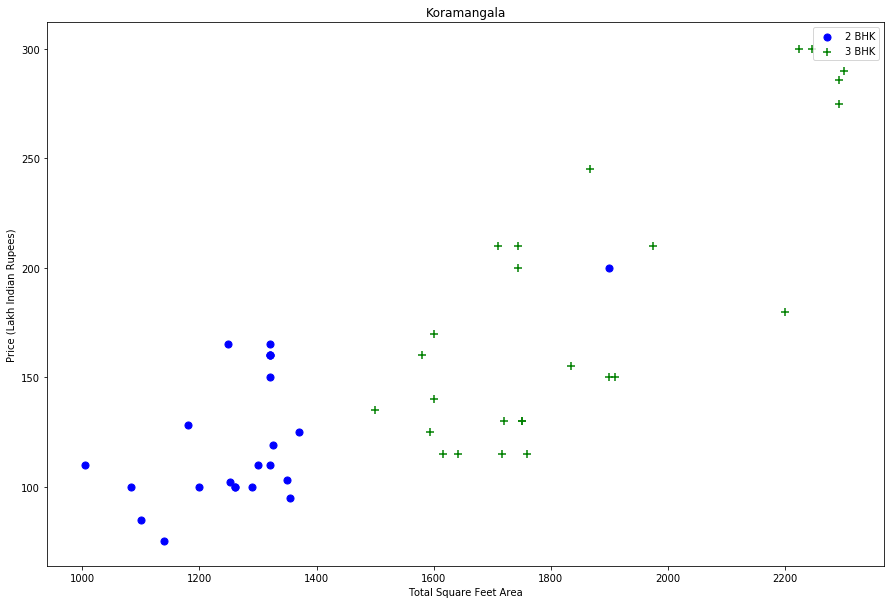

In [69]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.BHK==2)]
    bhk3 = df[(df.location==location) & (df.BHK==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,
                color='blue',
                label='2 BHK'
                , s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+',
                color='green',
                label='3 BHK',
                s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df5,"Koramangala")

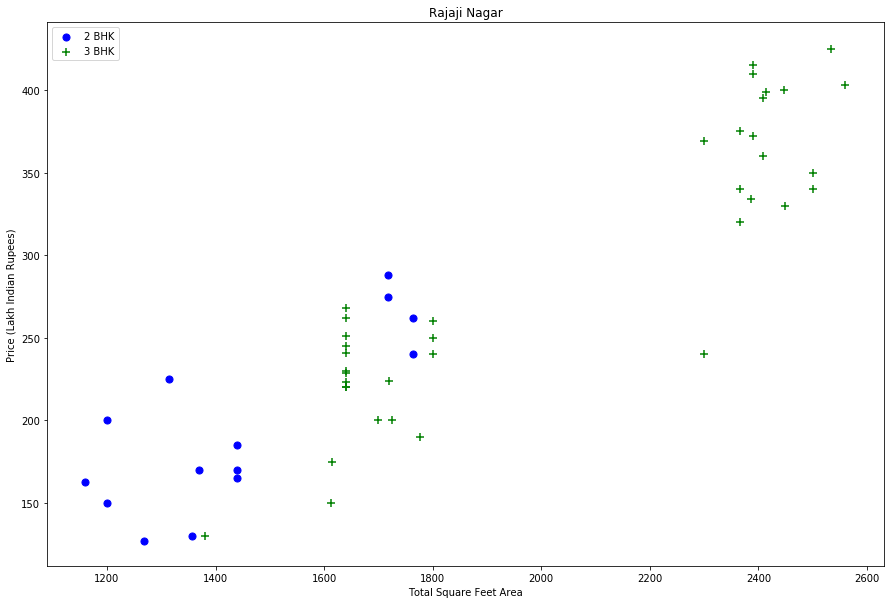

In [70]:
plot_scatter_chart(df5,"Rajaji Nagar")

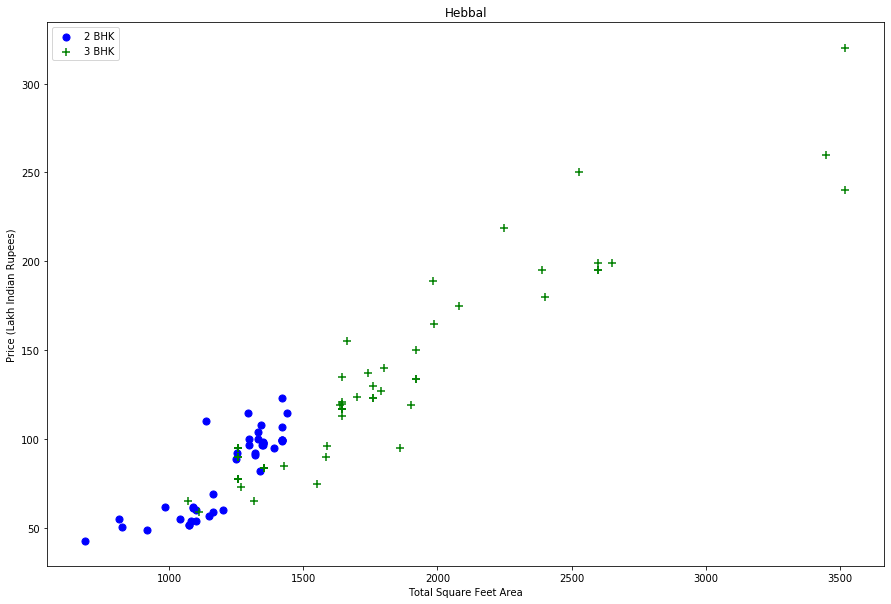

In [71]:
plot_scatter_chart(df5,"Hebbal")

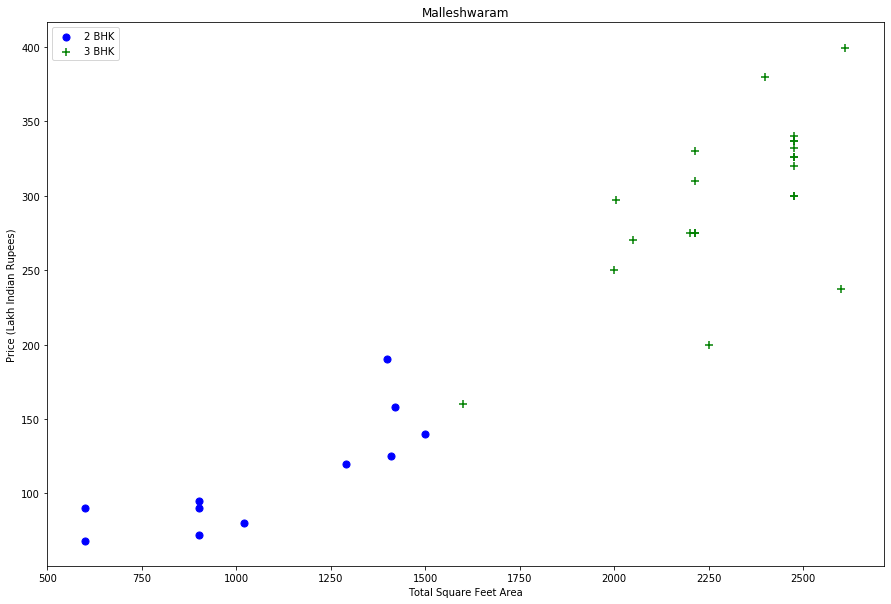

In [72]:
plot_scatter_chart(df5,"Malleshwaram")

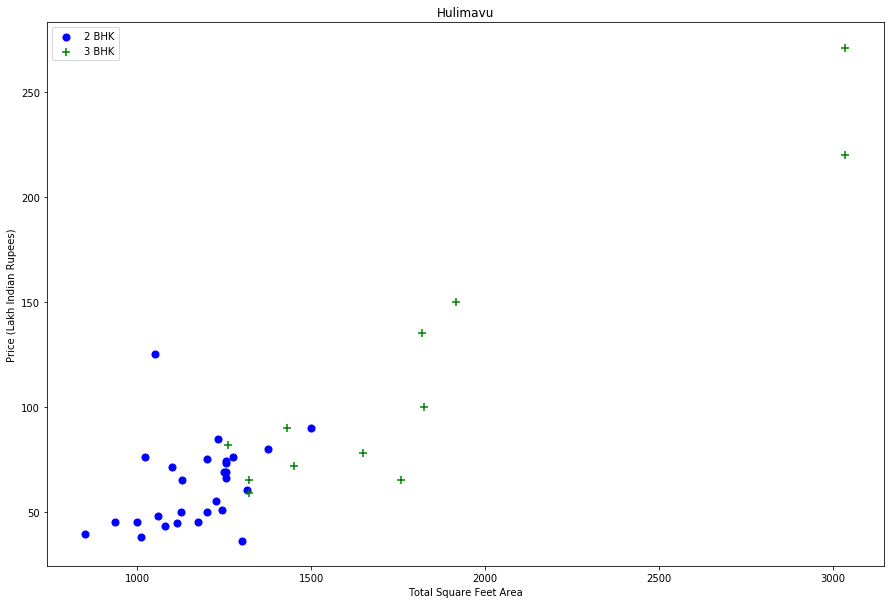

In [73]:
plot_scatter_chart(df5,"Hulimavu")

### We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.









* {
    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },
    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    },    
}

### Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [74]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df6 = remove_bhk_outliers(df5)



In [75]:
df6.shape

(7317, 7)

In [76]:
## PLOTTING AFTER PERFORMING OP TO REMOVE OUTLIERS! 

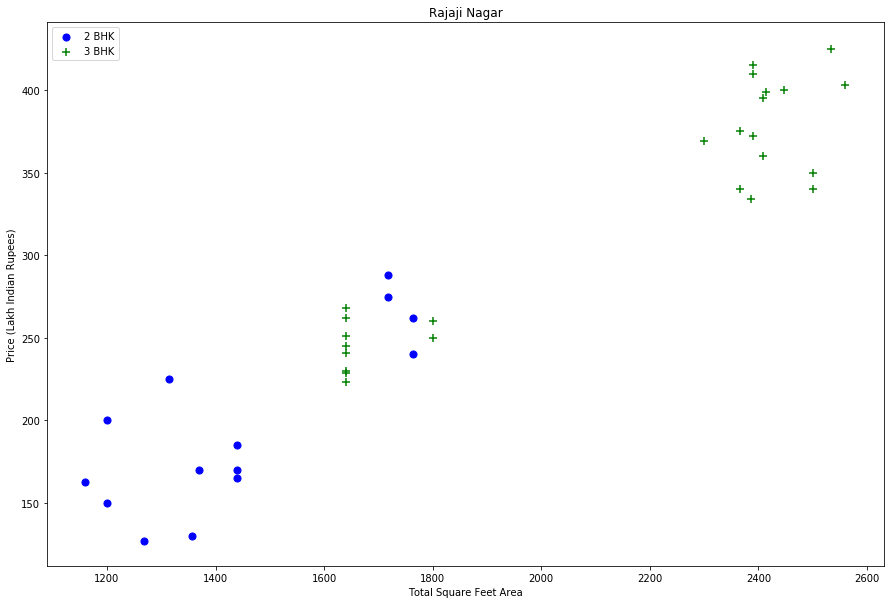

In [77]:
plot_scatter_chart(df6,"Rajaji Nagar")

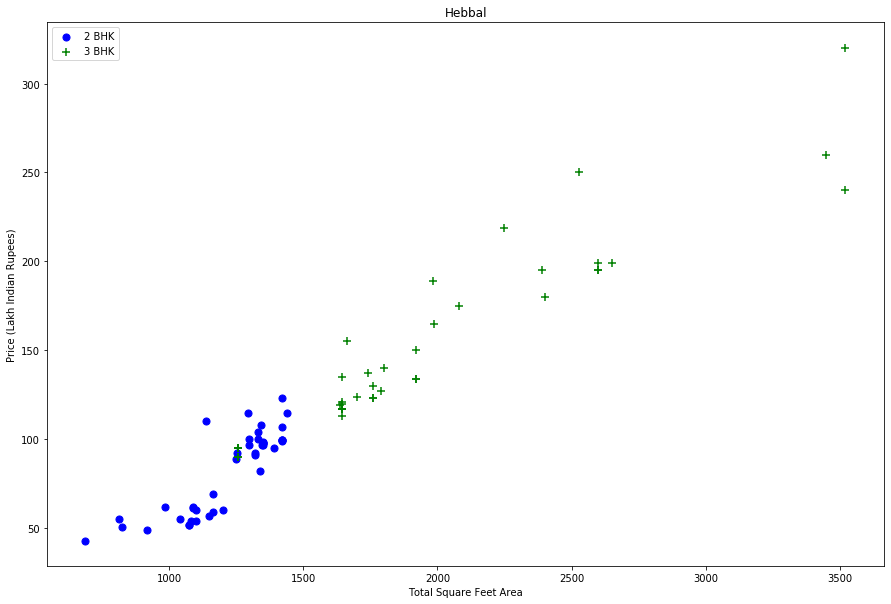

In [78]:
plot_scatter_chart(df6,"Hebbal")

### lets plot a BAR GRAPH , to see how many apartments or properties we have in per sqft area

In [79]:
from matplotlib import pyplot as plt

Text(0, 0.5, 'count')

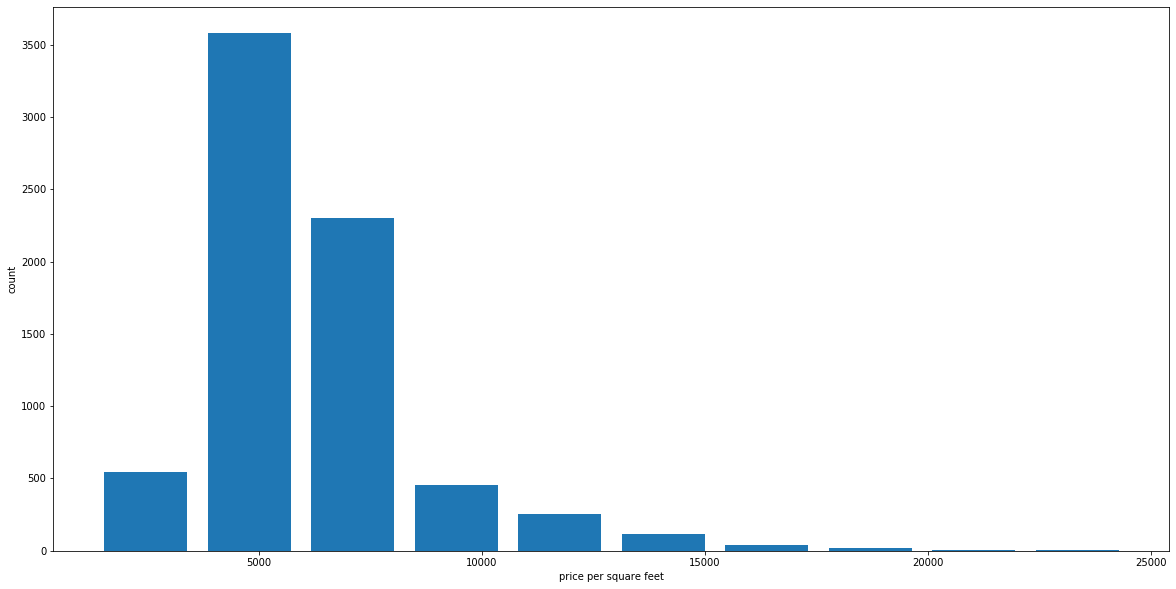

In [80]:
plt.rcParams['figure.figsize'] = (20,10)
plt.hist(df6.price_per_sqft, rwidth = 0.8)
plt.xlabel('price per square feet')
plt.ylabel("count")

### Outlier Removal Using Bathrooms Feature

In [81]:
df6.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [82]:
# why so many bathrooms lmao?


In [83]:
df6['bath'] > 10

0        False
1        False
2        False
3        False
4        False
         ...  
10233    False
10234    False
10237    False
10238    False
10241    False
Name: bath, Length: 7317, dtype: bool

In [84]:
df6[df6.bath > 10]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8483,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8572,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9306,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9637,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'count')

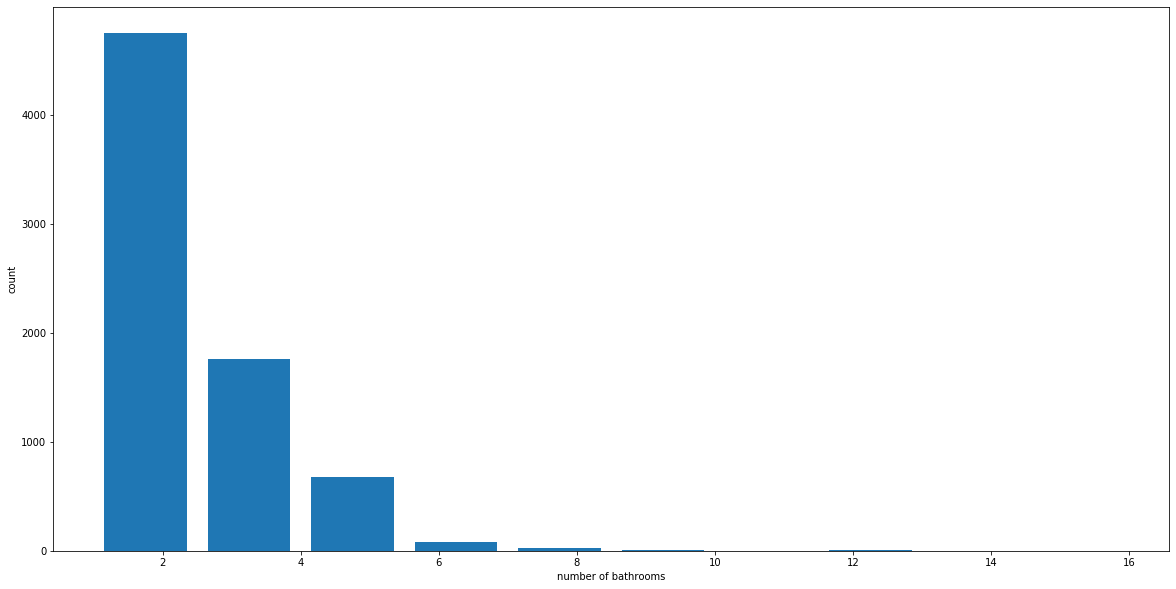

In [85]:
plt.hist(df6.bath ,rwidth= 0.8) # rwidth is the width of the bar
plt.xlabel('number of bathrooms')
plt.ylabel('count')

In [86]:
# if there any bathrooms > 2 or 3 , mark them as an outlier! 


In [87]:
df6[df6.bath>10]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8483,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8572,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9306,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9637,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


### it is unusual to have 2 more bathrooms than number of bedrooms in a home

In [88]:
df6[ df6.bath > df6.BHK + 2]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8408,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


#### Again the business manager has a conversation with you (i.e. a data scientist) that if you have 4 bedroom home and even if you have bathroom in all 4 rooms plus one guest bathroom, you will have total bath = total bed + 1 max. Anything above that is an outlier or a data error and can be removed

In [89]:
df7  = df6[df6.bath < df6.BHK + 2]
df7.shape

(7239, 7)

In [90]:
df7.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


In [91]:
df8 = df7.drop(['size','price_per_sqft'], axis = 1)
df8.head()

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [92]:
# we have location and ml model cannot interpret categorical data
# we need to convert categorical data to numerical data using the concept of
# 'ONE HOT CODE ENCODING!' also called dummies


# One Hot Code Encoding

In [94]:
dummies = pd.get_dummies(df8.location)
dummies 

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10233,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10234,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10237,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10238,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [97]:
df9 = pd.concat([df8,dummies.drop('other',axis = 1)], axis = 1)
df9.head()

,location,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [98]:
df10 = df9.drop('location',axis = 1)
df10.head(10)

,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2750.0,4.0,413.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2450.0,4.0,368.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1875.0,3.0,167.0,3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1500.0,5.0,85.0,5,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,2065.0,4.0,210.0,3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#  Build a Model Now...


In [99]:
df10.shape

(7239, 244)

In [100]:
X = df10.drop('price', axis = 1)
X.head()

,total_sqft,bath,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [101]:
Y = df10.price
Y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [102]:
# Importing train test method from sklearn


In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train , y_test = train_test_split(X,Y,test_size = 0.2,
                                                     random_state = 10)



In [105]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test,y_test)

0.8629132245229443

# Use K Fold cross validation to measure accuracy of our LinearRegression model

In [108]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score 

cv = ShuffleSplit(n_splits = 5 , test_size = 0.2 ,random_state = 0)

cross_val_score(LinearRegression() ,X,Y, cv = cv)

array([0.82702546, 0.86027005, 0.85322178, 0.8436466 , 0.85481502])

### For 5 iterations we can see that there are scoes above 80% accuracy all the time. Which is a good thing in this case for finding out the best prize solution for the given accuracy. We want to test few other algorithms for regression model to see if we get even better scores then the one given by LinerRegression. For this purpose we use GridSearchCV

* Exhaustive search over specified parameter values for an estimator.

    Important members are fit, predict.

    GridSearchCV implements a “fit” and a “score” method. It also implements “predict”, “predict_proba”, “decision_function”, “transform” and “inverse_transform” if they are implemented in the estimator used.

    The parameters of the estimator used to apply these methods are optimized by cross-validated grid-search over a parameter grid.



In [110]:
from sklearn.model_selection import GridSearchCV


from sklearn.linear_model import Lasso
# we're using Lasso Regression as well

from sklearn.tree import DecisionTreeRegressor
# we're using Decision Tree Algorithm as well



# GRID SEARCH CV will not only tell us the best algorithem model selection
# but also the  best parameters  
# this is called as 'Hyper Parameter tuning'

In [115]:
def find_best_model_using_gridsearchcv(X,Y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,Y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,Y)

,model,best_score,best_params
0,linear_regression,0.847796,{'normalize': False}
1,lasso,0.726780,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.718495,"{'criterion': 'mse', 'splitter': 'best'}"


In [116]:
# now after building the model and find out the best paramaters


### Lets test the given best model for few properties to predict the price range in the given location:-

In [119]:
def predict_price_location(location , sqft , bath,BHK):
    loc_index = np.where(X.columns == location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = BHK
    if loc_index >= 0:
        x[loc_index] = 1 
    return lr_clf.predict([x])[0]


In [152]:
predict_price_location('1st Block Jayanagar',1000, 2 ,2)

202.38386247926297

In [155]:
predict_price_location('1st Block Jayanagar',1200, 3 ,3)

220.62236338664079

In [124]:
predict_price_location('Hebbal',1000,2,2)

70.34792894096364

In [125]:
predict_price_location('Rajaji Nagar',1000,2,2)

225.78089629295144

In [126]:
predict_price_location('Rajaji Nagar',1200,2,3)

240.3024504935614

In [157]:
print("the price of 2 bhk plae in jayanagar 1st block for 2 bhk is:",predict_price_location('1st Block Jayanagar',1000, 2 ,2),"lakhs")

the price of 2 bhk plae in jayanagar 1st block for 2 bhk is: 202.38386247926297 lakhs


In [148]:
print("the price of a place in Hebbal for 2 BHK is :",predict_price_location('Hebbal',1000,2,2),"lakhs")

the price of a place in Hebbal for 2 BHK is : 70.34792894096364 lakhs


# Time to Export the model to a pickle file! 

In [158]:
import pickle 
with open('bangalore_home_prices_model.pickle', 'wb') as f:
    pickle.dump(lr_clf,f)

## We need columns information to a file which will be useful late on in our prediction application

In [159]:
import json
columns = {
    'data_columns':[col.lower() for col in X.columns]
}
with open('columns.json','w') as f:
    f.write(json.dumps(columns))